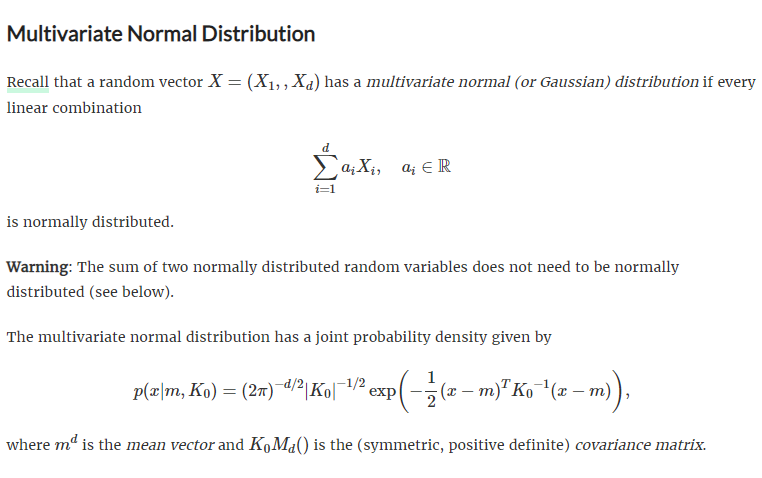

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### **Seting Parameters**

In [ ]:
# dimensions defined as.
d = 10

# Mean vector setting.
key = jax.random.PRNGKey(d) 
m = jax.random.uniform(key, shape=[d], minval = 1, maxval =  10).reshape(d,1)

# Covarience function setting.
K_0 = jax.random.uniform(key, shape=[d] * 2, minval = 1, maxval =  10).reshape(d,d)


Let us compute the eigenvalues of K_0

In [ ]:
# Eigenvalues covariance function.
jax.numpy.linalg.eig(K_0)

[DeviceArray([56.781525  +0.j       ,  3.7500281 +7.43725j  ,
               3.7500281 -7.43725j  , -1.8435751 +5.8017864j,
              -1.8435751 -5.8017864j,  3.9964538 +0.j       ,
              -5.0063343 +2.6998203j, -5.0063343 -2.6998203j,
               0.11279628+0.j       , -4.743965  +0.j       ],            dtype=complex64),
 DeviceArray([[-0.36522445+0.j        , -0.23483035-0.25760415j,
               -0.23483035+0.25760415j,  0.12658343+0.3102752j ,
                0.12658343-0.3102752j , -0.18132663+0.j        ,
               -0.01687903-0.21616253j, -0.01687903+0.21616253j,
               -0.22404262+0.j        ,  0.18252951+0.j        ],
              [-0.23900452+0.j        ,  0.14368744-0.30707154j,
                0.14368744+0.30707154j,  0.07635012-0.01844868j,
                0.07635012+0.01844868j,  0.15959653+0.j        ,
                0.31065816-0.17265631j,  0.31065816+0.17265631j,
                0.23711088+0.j        , -0.52475244+0.j        ],
        

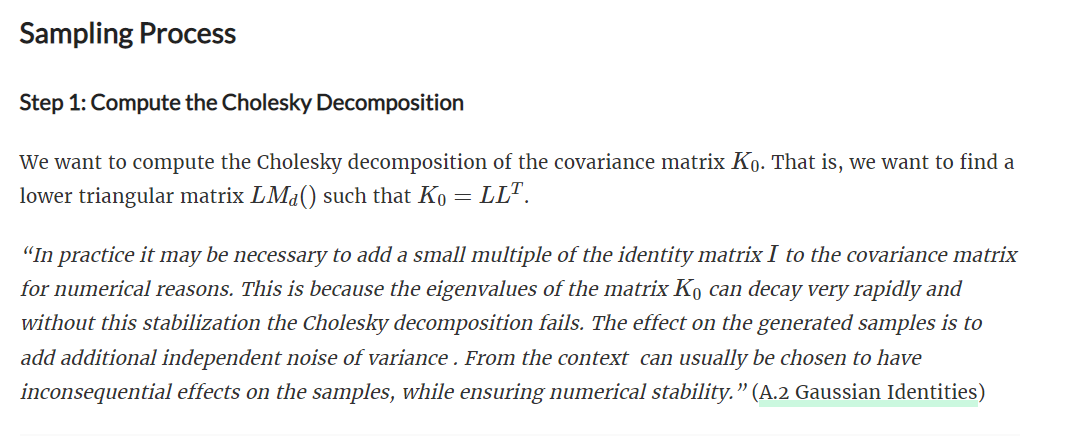

In [ ]:
# Epsilon defined as.
epsilon = 0.002

# Adding small pertturbation. 
K = K_0 + epsilon * jax.numpy.identity(d)
K

DeviceArray([[6.360591 , 8.857609 , 8.349787 , 8.574057 , 6.471467 ,
              9.748783 , 7.383116 , 4.1455936, 6.5758514, 1.4014548],
             [1.3749138, 2.745392 , 6.402293 , 2.2410345, 2.470638 ,
              8.918173 , 8.389894 , 2.227069 , 7.2942753, 2.246075 ],
             [2.5921001, 7.108906 , 3.7156222, 7.8890705, 1.3019642,
              7.776376 , 6.8376017, 3.2463832, 2.0125983, 6.446117 ],
             [2.6519222, 6.0413265, 8.633713 , 9.816725 , 8.7691345,
              4.302812 , 6.475634 , 9.027982 , 6.6767335, 7.588652 ],
             [4.2951827, 8.939576 , 4.8198004, 1.6224785, 2.188115 ,
              1.3275825, 1.384309 , 6.663756 , 5.391629 , 2.0369754],
             [4.6437464, 9.374079 , 7.1492677, 9.117583 , 8.204902 ,
              3.640959 , 8.217487 , 1.1676981, 4.30072  , 8.093663 ],
             [1.6810654, 3.2981875, 3.987246 , 9.684298 , 7.7287774,
              8.438071 , 4.3689594, 3.4561987, 2.6559637, 8.770016 ],
             [8.560442 , 7.

In [ ]:
# Look of Identity martrix of size 10x10 which we pass in above code
jax.numpy.identity(d)

DeviceArray([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
             [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
             [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
             [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
             [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#  Cholesky decomposition.
K = K @ K.T
L = jax.numpy.linalg.cholesky(K)
L

DeviceArray([[ 2.2714943e+01,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 1.4569937e+01,  7.8990788e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 1.5345250e+01,  9.2324901e-01,  7.8760142e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 2.0476025e+01, -7.6747142e-02,  3.3043659e+00,
               1.0259810e+01,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
               0.0000000e+00],
             [ 1.1618623e+01, -2.1188450e+00, -3.4142363e-01,
               3.0683863e+00,  7.8297682e+00,  0.0000000e+00,
        

Let us verify the desired property:

In [ ]:
jnp.dot(L, jnp.transpose(L))

DeviceArray([[515.9686 , 330.9553 , 348.56647, 465.11172, 263.91635,
              444.16632, 364.85098, 446.95505, 356.26776, 433.69437],
             [330.9553 , 274.6785 , 230.87215, 297.72815, 152.54567,
              272.16083, 236.36743, 280.73505, 213.86229, 290.65472],
             [348.56647, 230.87215, 298.3607 , 340.1641 , 173.6454 ,
              336.97272, 297.67065, 312.0931 , 248.76271, 323.71222],
             [465.11172, 297.72815, 340.1641 , 535.456  , 268.4187 ,
              461.68262, 401.73846, 414.17883, 350.18652, 420.5612 ],
             [263.91635, 152.54567, 173.6454 , 268.4187 , 210.31874,
              234.61536, 161.01239, 242.10457, 204.43286, 235.60558],
             [444.16632, 272.16083, 336.97272, 461.68262, 234.61536,
              477.1513 , 372.00552, 389.10773, 337.36246, 357.34576],
             [364.85098, 236.36743, 297.67065, 401.73846, 161.01239,
              372.00552, 369.3232 , 338.4303 , 269.84277, 333.00363],
             [446.95505, 28

**Step 2: Generate Independent Samples 
u
∼
N
(
0
,
I
)**

In [ ]:
n = 10000

key1 = jax.random.PRNGKey(d) 
u = jax.random.uniform(key1, shape=[d, n]).reshape(d,n)

**Step 3: Compute** 
x
=
m
+
L
u

The variable 
x
=
m
+
L
u
 has a multivariate uniform distribution since is a linear combination of independent uniformally distributed variables. Moreover,

E
[
x
]
=
E
[
m
+
L
u
]
=
m
+
L
E
[
u
]
=
m

and

E
[
x
x
T
]
=
E
[
m
m
T
]
+
E
[
m
u
T
L
T
]
+
E
[
L
u
m
T
]
+
E
[
L
u
u
T
L
T
]
=
|
|
m
2
|
|
+
L
E
[
u
u
T
]
L
T
=
∥
m
∥
2
+
K

hence, \(E[(x-m)(x^T-mT)] = K\).

In [ ]:
x = m + jnp.dot(L, u)


**Plotting Distribution**
Let us plot the density function.

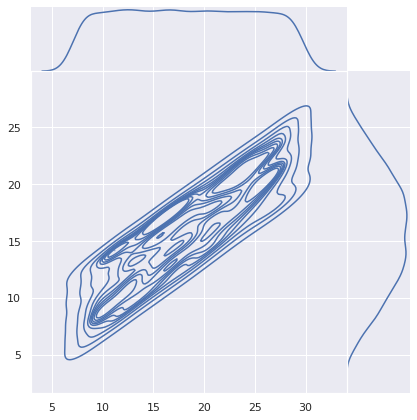

In [ ]:
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);

**Using Numpy Sampler**

Numpy has a build in multivariate normal sampling function:

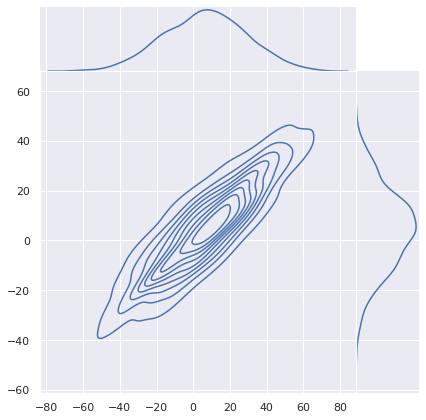

In [ ]:
key3 = jax.random.PRNGKey(d) 
n = 1000
z = jax.random.multivariate_normal(key3, mean = m.reshape(d,), cov = K, shape = (n,))
y = jnp.transpose(z)

# Density function is plotting as.
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0);

References 
1. Sampling from a Multivariate Normal Distribution, https://juanitorduz.github.io/multivariate_normal/
2. JAX reference documentation, https://jax.readthedocs.io/en/latest/#